In [1]:
#@title Підключення DEAP
!pip install deap
!cp /content/drive/MyDrive/Colab\ Notebooks/1-d-cutting/63-1472.dat .
!cp /content/drive/MyDrive/Colab\ Notebooks/1-d-cutting/60-1383.dat .
!cp /content/drive/MyDrive/Colab\ Notebooks/1-d-cutting/20-571.dat .

In [2]:
#@title Ініціалізація змінних, визначення функцій, створення екземалярів класів "зали слави" і статистики з реєстрацією необхідних статистичних функцій

import os
import array
import random
from urllib.request import urlopen
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from IPython import display

def evalTSP(individual):
  M = len(set(individual))

  length = len (individual)

  for i in range (length):
    tmp = 0
    for j in range (length):
      if individual[j] == i:
        tmp += item_lengths[j]
    if tmp > BilletsLength:
      return 0.9 / pow (BilletsLength, 2),
  
  if Fintess_formula == '(1)':
    return 1.0 / M,

  sum = 0
  for i in range (length):
    tmp = 0
    for j in range (length):
      if individual[j] == i:
        tmp += item_lengths[j]
    sum += pow (tmp/BilletsLength,2)
  
  return sum/M, 


def show_plan_text (individual):
  sum=0
  num=0

  length = len (individual)

  for i in range (length):
    sum = 0
    for j in range (length):
      if individual[j] == i:
        sum += item_lengths[j]

    if sum != 0:
      num += 1

      tmp=""
      for j in range (length):
        if individual[j] == i:
          if tmp == "":
            tmp = f'{item_lengths[j]}'
          else:
            tmp += f' + {item_lengths[j]}'
      rest = BilletsLength - sum
      print (f'{num} : {tmp} | {rest}')

def normalize_array (array):
  max = len(array[0])
  for item in array:
    if len(item)>max:
      max=len(item)
  
  for i in range(len(array)):
    for j in range(len(array[i]), max):
      array[i].append(0)
  return array

def show_plan (individual, log=None):
  sum=0
  num=0

  length = len (individual)

  fullarray=[]
  title = []

  rest_elements=[]

  for i in range (length):
    sum = 0
    for j in range (length):
      if individual[j] == i:
        sum += item_lengths[j]

    if sum != 0:
      num += 1
      title.append(num)

      tmp=""
      tmparray = []
      for j in range (length):
        if individual[j] == i:     
          tmparray.append (item_lengths[j])
      
      rest = BilletsLength - sum
      rest_elements.append (rest)
      fullarray.append (tmparray)

  y_pos = np.arange(len(fullarray))

  #fig = plt.figure(figsize=(10,0.6*unique_count))
  #ax = fig.add_subplot(111)

  ax.clear()
  patch_handles = []
  # left alignment of data starts at zero
  left = np.zeros(len(title)) 

  fullarray = normalize_array(fullarray)
  fullarray_t = np.transpose(fullarray)

  for i, d in enumerate(fullarray_t):
      patch_handles.append(ax.barh(y_pos, d, color='yellow', align='center', left=left, edgecolor = 'black'))
      left += d
  patch_handles.append(ax.barh(y_pos, rest_elements, color='white', align='center', left=left, edgecolor = 'black'))
 
  for j in range(len(patch_handles)-1):
      for i, patch in enumerate(patch_handles[j].get_children()):
        if fullarray[i][j]!=0:
          bl = patch.get_xy()
          x = 0.5 * patch.get_width() + bl[0]
          y = 0.5 * patch.get_height() + bl[1]
          ax.text(x,y, "%d" % (fullarray[i][j]), ha='center')
  j= len(patch_handles) - 1  
  for i, patch in enumerate(patch_handles[j].get_children()):
    if rest_elements[i]!=0:
      bl = patch.get_xy()
      x = 0.5 * patch.get_width() + bl[0]
      y = 0.5 * patch.get_height() + bl[1]
      ax.text(x,y, "%d" % (rest_elements[i]), ha='center')

  ax.set_yticks(y_pos)
  ax.set_yticklabels(title)

  if log==None:  
    return
  
  ax2.clear()
  x,y=log.select("gen", "avg")
  ax2.plot(x, y, label='avg')
  ax2.set_xlabel("Generation")
  ax2.set_ylabel("Fitness")
  x,y=log.select("gen", "max")
  ax2.plot(x, y, label='max')
  x,y=log.select("gen", "min")
  ax2.plot(x, y, label='min' )
  ax2.legend(loc="upper right")

  display.display(plt.gcf())
  display.clear_output(wait=True)

def show_info(best_individual, loginfo):

  max_gen = np.max(loginfo.select("gen"))
  print (f'Пройдено епох: {max_gen}')

  used_count = len(set(hof[0]))

  print (f'Використано заготівок: {used_count}')

  print (f"Значення фітнес-функції: {best_individual.fitness.values}")

  print ('Використані параметри:')
  print (f'population_size: {population_size}')
  print (f'selection: {selection}')
  print (f'crossover: {crossover}')
  print (f'cxpb: {cxpb}')
  print (f'mutpb: {mutpb}')
  print (f'indpb: {indpb}')
  print (f'ngen: {ngen}')

def toolbox_definition(filename):
  global item_lengths, item_count, toolbox, fig, ax
  item_lengths=np.genfromtxt(filename, delimiter=' ')
  item_count=len(item_lengths)

  wrost_case = np.arange (item_count);

  fig = plt.figure(figsize=(10,0.6*item_count))
  ax = fig.add_subplot(111)

  show_plan(wrost_case)

  toolbox = base.Toolbox()

  toolbox.register("indices", random.choices, range(item_count), k=item_count)
  toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
  toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def get_target_count ():
  return math.ceil(np.sum(item_lengths)/BilletsLength)

BilletsLength = 100
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)


hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)


def eaSimpleNew(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__, delay=1):
  global fig, ax, ax2

  logbook = tools.Logbook()
  logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

  # Evaluate the individuals with an invalid fitness
  invalid_ind = [ind for ind in population if not ind.fitness.valid]
  fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
  for ind, fit in zip(invalid_ind, fitnesses):
    ind.fitness.values = fit

  if halloffame is not None:
    halloffame.update(population)

  record = stats.compile(population) if stats else {}
  logbook.record(gen=0, nevals=len(invalid_ind), **record)
  if verbose:
    print (logbook.stream)

  # Begin the generational process 
  fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16, 0.7*get_target_count()))
  for gen in range(1, ngen + 1):
    try:
      # Select the next generation individuals
      offspring = toolbox.select(population, len(population))

      # Vary the pool of individuals
      offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

      # Evaluate the individuals with an invalid fitness
      invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
      for ind, fit in zip(invalid_ind, fitnesses):
          ind.fitness.values = fit

      # Update the hall of fame with the generated individuals
      if halloffame is not None:
          halloffame.update(offspring)

      # Replace the current population by the offspring
      population[:] = offspring

      # Append the current generation statistics to the logbook
      record = stats.compile(population) if stats else {}
      logbook.record(gen=gen, nevals=len(invalid_ind), **record)

      show_plan (halloffame[0], logbook)

      used_count = len(set(halloffame[0]))

      if used_count == get_target_count():
        break

      time.sleep(delay) # sec

      if verbose:
          print (logbook.stream)
    except KeyboardInterrupt:
      break
    
  show_info (halloffame[0], logbook)

  return population, logbook


Цільова кількість заготівок: 6


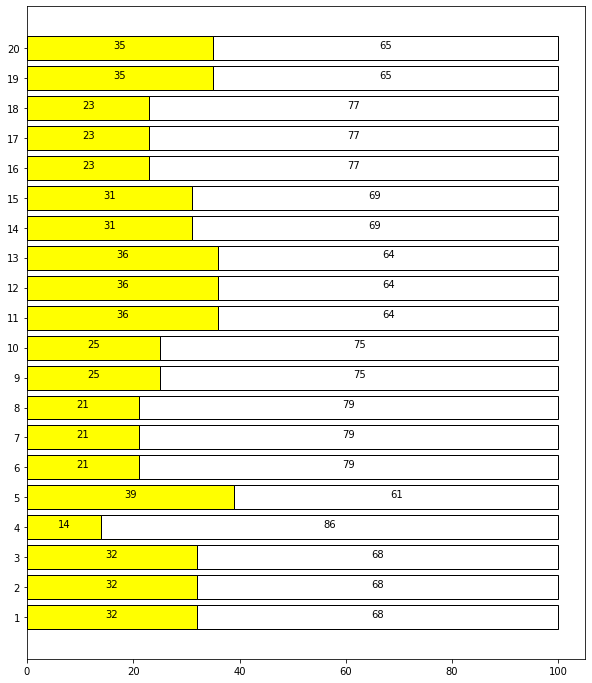

In [12]:
#@title Завантаження карти заготівок та реєестрація операторів ініціалізації особини і популяції

filename='20-571.dat' #@param ['20-571.dat', '60-1383.dat', '63-1472.dat']

toolbox_definition (filename)

print (f'Цільова кількість заготівок: {get_target_count()}')


In [15]:
#@title Визначення параметрів задачі та генетичного алгоритму, реєстрація генетичних операторів
population_size =  200#@param {type:"integer"}

Fintess_formula = '(2)'#@param ['(1)', '(2)']

selection = 'tournament' #@param ["tournament", "roulette", "lexicase"]

tournsize =  3#@param {type:"integer"}

crossover = 'two-point crossover' #@param ["one-point crossover", "two-point crossover"]

cxpb =  0.9#@param {type:"number"}

mutpb = 0.85 #@param {type:"number"}

indpb = 0.01 #@param {type:"number"}

ngen =  100#@param {type:"integer"} 

if crossover=="ordered crossover (2OX)":
  crossover_function=tools.cxOnePoint
else: 
  crossover_function=tools.cxTwoPoint

if selection=='tournament':
  selection_function=tools.selTournament  
  toolbox.register("select", selection_function, tournsize=tournsize)
  
elif selection=='roulette':
  selection_function=tools.selRoulette
  toolbox.register("select", selection_function)
else:
  selection_function=tools.selLexicase
  toolbox.register("select", selection_function)



toolbox.register("mate", crossover_function)
toolbox.register("mutate", tools.mutUniformInt, indpb=indpb, low=0, up=item_count-1)
toolbox.register("evaluate", evalTSP)

Пройдено епох: 100
Використано заготівок: 6
Значення фітнес-функції: (0.9097833333333334,)
Використані параметри:
population_size: 200
selection: tournament
crossover: two-point crossover
cxpb: 0.9
mutpb: 0.85
indpb: 0.01
ngen: 100


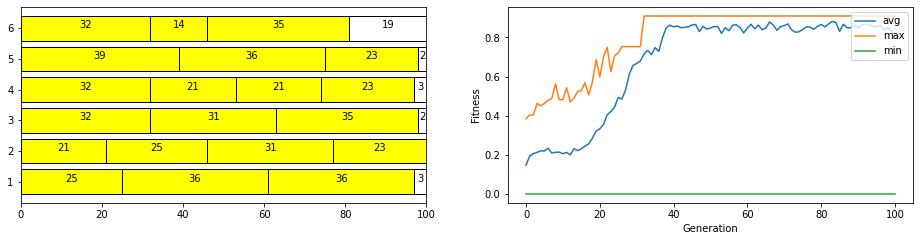

In [16]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального розкрою і його характеристик.
verbose = True #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()
pop, log=algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose)


unique_count = len(set(hof[0]))
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16, 0.6*unique_count))
show_plan (hof[0], log)

show_info (hof[0], log)


Пройдено епох: 100
Використано заготівок: 7
Значення фітнес-функції: (0.7314714285714287,)
Використані параметри:
population_size: 200
selection: tournament
crossover: two-point crossover
cxpb: 0.9
mutpb: 0.85
indpb: 0.01
ngen: 100


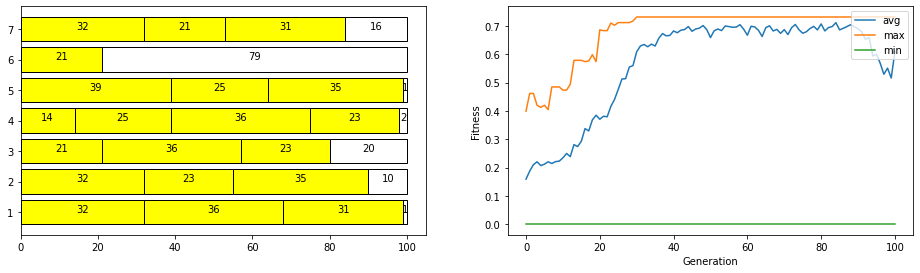

In [19]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()

pop, log=eaSimpleNew(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose, delay=0)


# Обчислені комірки

20

Пройдено епох: 54
Використано заготівок: 6
Значення фітнес-функції: (0.90745,)
Використані параметри:
population_size: 200
selection: tournament
crossover: two-point crossover
cxpb: 0.9
mutpb: 0.85
indpb: 0.01
ngen: 500


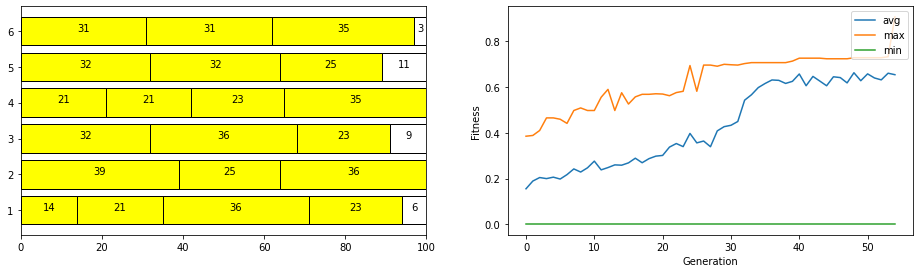

In [ ]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()

pop, log=eaSimpleNew(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose, delay=0)


60

Пройдено епох: 312
Використано заготівок: 14
Значення фітнес-функції: (0.9767214285714285,)
Використані параметри:
population_size: 200
selection: tournament
crossover: two-point crossover
cxpb: 0.9
mutpb: 0.85
indpb: 0.01
ngen: 500


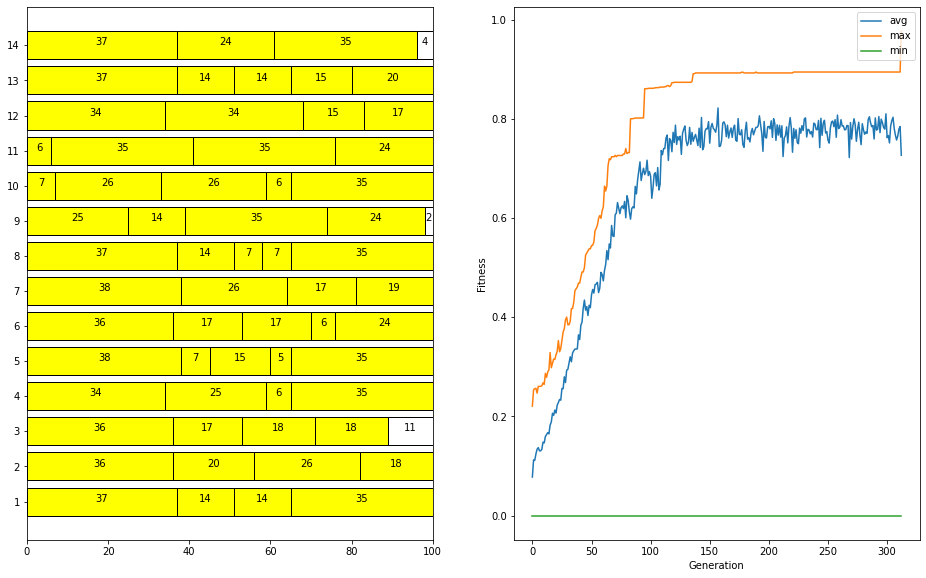

In [ ]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()

pop, log=eaSimpleNew(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose, delay=0)


63

Пройдено епох: 347
Використано заготівок: 15
Значення фітнес-функції: (0.9638666666666666,)
Використані параметри:
population_size: 200
selection: tournament
crossover: two-point crossover
cxpb: 0.9
mutpb: 0.85
indpb: 0.01
ngen: 500


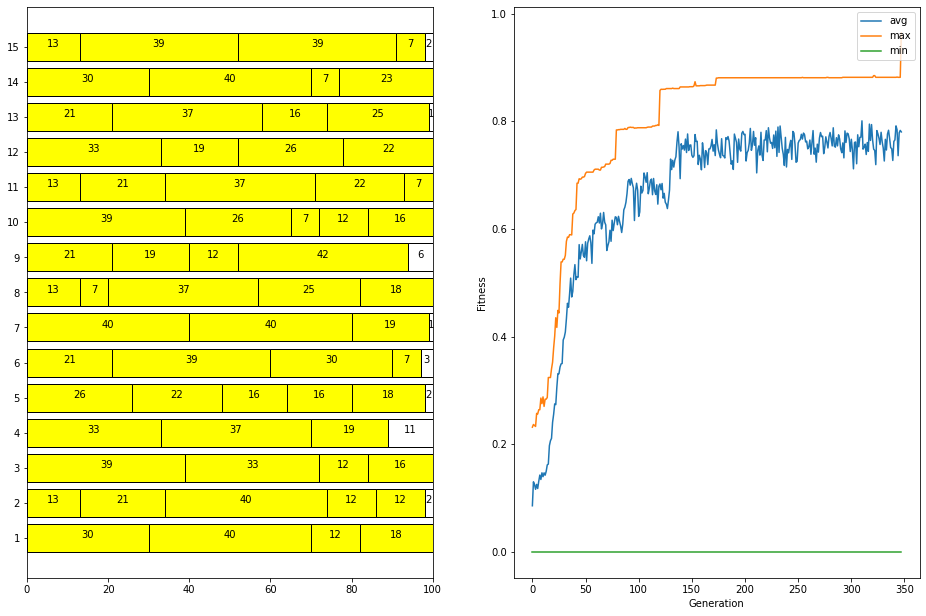

In [ ]:
#@title Створення популяції, очистка "зали слави", запуск генетичного алгоритму, побудова графіків історії статистики, візуалізація оптимального туру і його характеристик.
verbose = False #@param {type:"boolean"}

pop = toolbox.population(n=population_size)
hof.clear()

pop, log=eaSimpleNew(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose, delay=0)
